In [1]:
%pylab inline
import pandas as pd
import uproot, awkward as ak
import sys
from yahist import Hist1D
from yahist.utils import plot_stack
sys.path.append("/home/users/bsathian/HHggTauTau/HggAnalysisDev/Preselection/plots_and_tables/")
from plotter import Plotter
import json
import mplhep as hep
plt.style.use(hep.style.CMS)

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
process_ids = {}
process_ids["Data"] = 0

process_ids["HH_ggTauTau"] = -1
#process_ids["HH_ggZZ"] = -2
#process_ids["HH_ggZZ_4l"] = -5
#process_ids["HH_ggZZ_2l2q"] = -6
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4

process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [3]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["HH_ggZZ_4l"] = True
is_resonant["HH_ggZZ_2l2q"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True

In [4]:
colors = {}
colors["Data"] = "k"
colors["DiPhoton"] = "C0"
colors["GJets"] = "C1"
colors["HH_ggTauTau"] = "k"
colors["HH_ggZZ"] = "b"
colors["HH_ggWW"] = "g"
colors["TTbar"] = "C3"
colors["VH"] = "C4"
colors["WGamma"] = "C5"
colors["ZGamma"] = "C6"
colors["ttH"] = "C7"
colors["ggH"] = "C8"
colors["VBFH"] = "C2"

In [6]:
t = uproot.open("../BDT/20220131_data_driven_diPhoton_scaled_with_mllGamma_cut.root")["t"]
data_df = t.arrays(library="pd")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


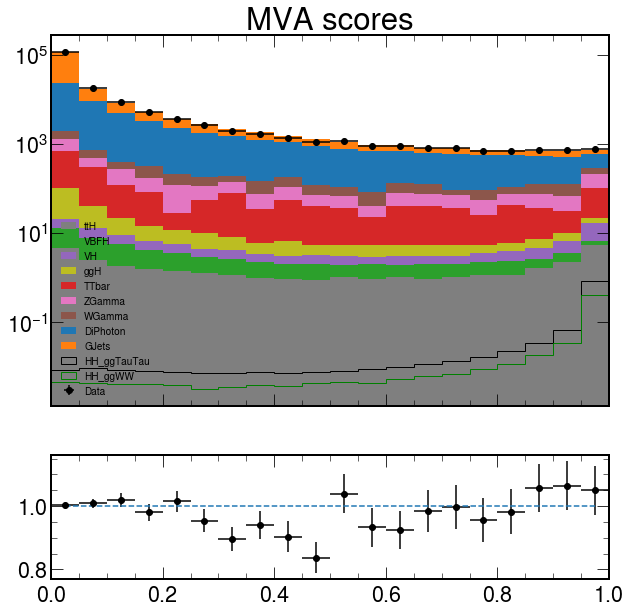

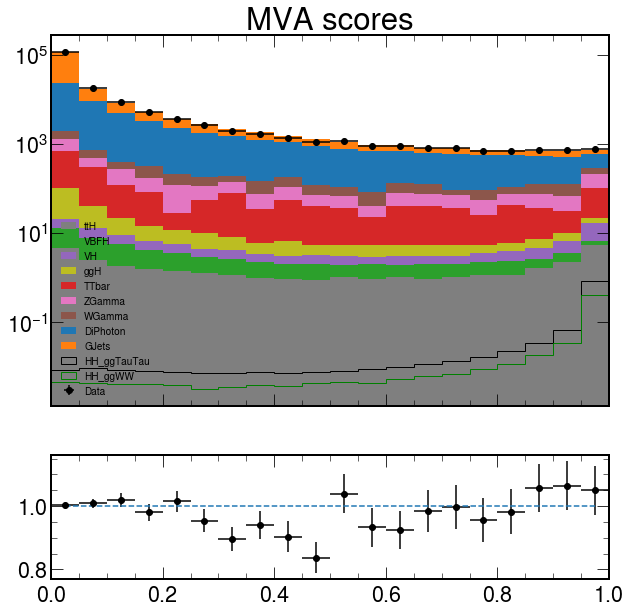

In [9]:
mgg_binning = "20,0,1" # ROOT convention

data_mva_hists = {}
for process, process_id in process_ids.items():
    toFill = data_df.loc[data_df["process_id"] == process_id, "mva_score"] # select by process, then select the quantity
    weight = data_df.loc[data_df["process_id"] == process_id, "weight"]
    if process in colors:
        data_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        data_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
data_mva_hists["TTbar"] += data_mva_hists["TTGamma"] + data_mva_hists["TTGG"]

hist_stack = [hist for process, hist in data_mva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
data_mva_hists["Data"].plot(ax=ax1, show_errors=True, color="k")


data_mva_hists["HH_ggWW"] = data_mva_hists["HH_ggWW_dileptonic"] + data_mva_hists["HH_ggWW_semileptonic"]
data_mva_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
data_mva_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
#plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax1.set_yscale("log")
ax1.legend(fontsize=10)

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = data_mva_hists["Data"].copy()
ratio_hist = (ratio_hist / total_background)
ratio_hist.plot(ax=ax2, show_errors=True, legend=False)
plt.sca(ax2)
plt.plot(ratio_hist.bin_centers, np.ones_like(ratio_hist.bin_centers), "--")
ax1.set_title("MVA scores")
plt.savefig("data_driven_mva_scores.pdf")

In [10]:
t = uproot.open("../BDT/20220112_mc_only_zipped.root")["t"]
mc_df = t.arrays(library="pd")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


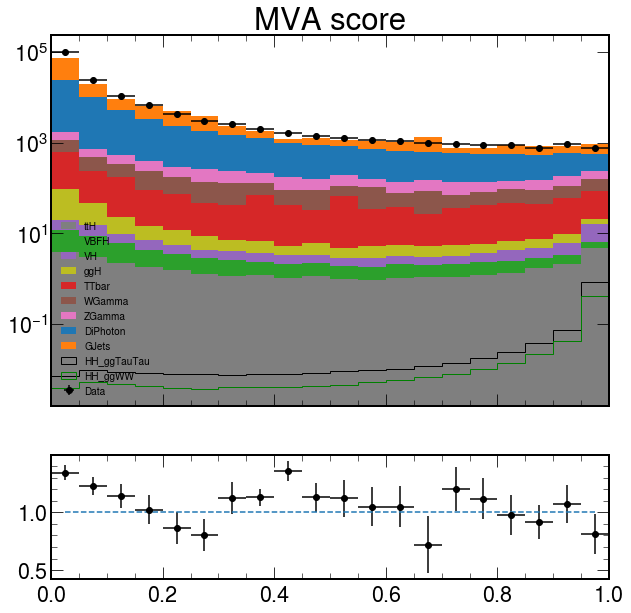

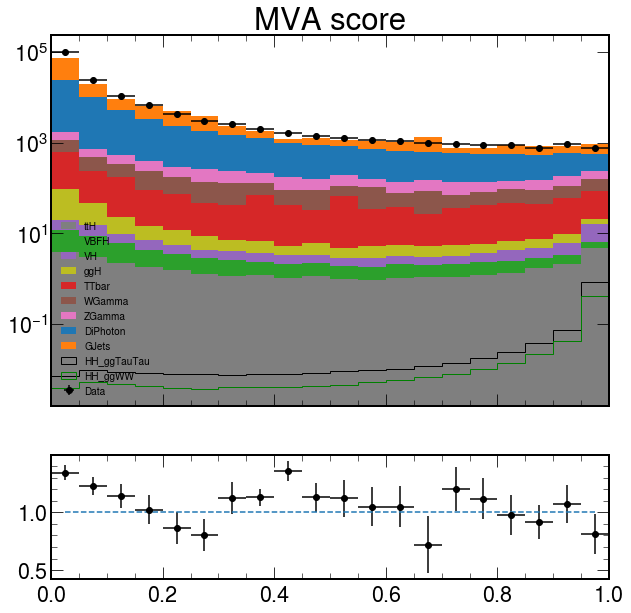

In [11]:
mgg_binning = "20,0,1" # ROOT convention

mc_mva_hists = {}
for process, process_id in process_ids.items():
    toFill = mc_df.loc[mc_df["process_id"] == process_id, "bdt_mc_only"] # select by process, then select the quantity
    weight = mc_df.loc[mc_df["process_id"] == process_id, "weight"]
    if process in colors:
        mc_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mc_mva_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mc_mva_hists["TTbar"] += mc_mva_hists["TTGamma"] + mc_mva_hists["TTGG"]

hist_stack = [hist for process, hist in mc_mva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mc_mva_hists["Data"].plot(ax=ax1, show_errors=True, color="k")


mc_mva_hists["HH_ggWW"] = mc_mva_hists["HH_ggWW_dileptonic"] + mc_mva_hists["HH_ggWW_semileptonic"]
mc_mva_hists["HH_ggTauTau"].plot(ax=ax1, color=colors["HH_ggTauTau"], histtype="step")
mc_mva_hists["HH_ggWW"].plot(ax=ax1, histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
#plt.title("Di-Photon Mass Non-resonant backgrounds Category 3")
ax1.set_yscale("log")
ax1.legend(fontsize=10)

total_background = hist_stack[0].copy()
for hist in hist_stack[1:]:
        total_background = total_background + hist
ratio_hist = mc_mva_hists["Data"].copy()
ratio_hist = (ratio_hist / total_background)
ratio_hist.plot(ax=ax2, show_errors=True, legend=False)
plt.sca(ax2)
plt.plot(ratio_hist.bin_centers, np.ones_like(ratio_hist.bin_centers), "--")
ax1.set_title("MVA score")
plt.savefig("mc_only_mva_scores.pdf")

Data-data comparison

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


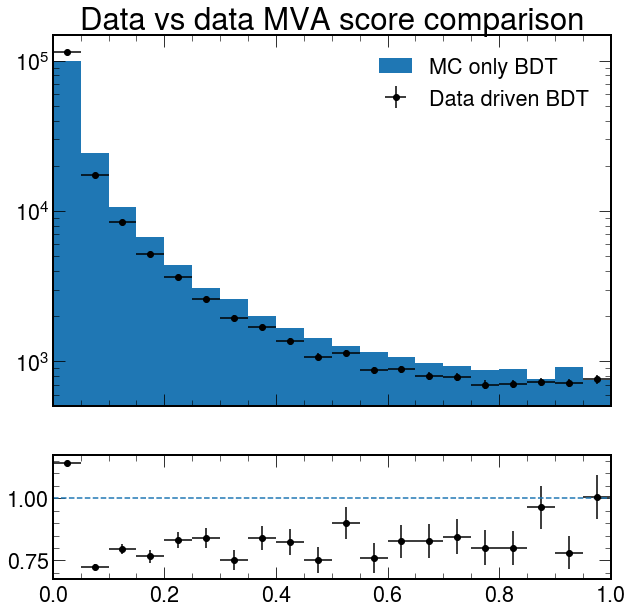

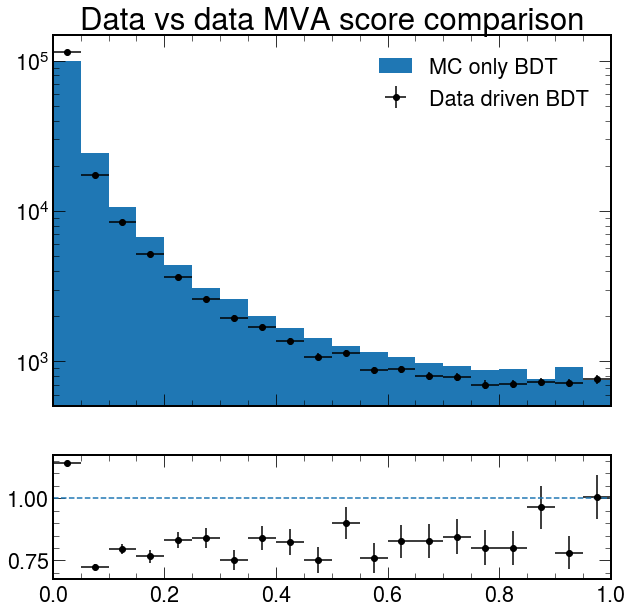

In [12]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
plt.sca(ax1)
data_mva_hists["Data"].plot(show_errors=True, label="Data driven BDT")
mc_mva_hists["Data"].plot(color="C0", histtype="stepfilled", label="MC only BDT")
plt.title("Data vs data MVA score comparison")
plt.yscale("log")
plt.sca(ax2)
ratio_hist = data_mva_hists["Data"].copy()
ratio_hist /= mc_mva_hists["Data"]
ratio_hist.plot(show_errors=True, legend=False)
plt.plot(linspace(0,1,50), np.ones(50), "--")
plt.savefig("mva_score_compare.pdf")

In [ ]:
mc_df.loc[mc_df["process_id"] == 0]

In [ ]:
data_df.loc[data_df["process_id"] == 0]

In [ ]:
# blend the two

composite_data_df = mc_df.loc[mc_df["process_id"] == 0].copy()
composite_data_df["bdt_data_driven"] = data_df["bdt_data_driven"]

In [ ]:
from yahist import Hist2D
Hist2D(composite_data_df[["bdt_mc_only", "bdt_data_driven"]], bins=(linspace(0,1,50), linspace(0,1,50))).plot()